# REDA1-CE1000: Introduction to Real Estate Data Analytics

## Week 3: Deploying an Algorithm to Explore a Conjecture 



### An Algorithm



### A Conjecture from Finance



### Real-World Hypothesis Testing

## An Algorithm: Representation, Evaluation and Optimization

### Representation

* $y = m \cdot x + b$: **a line**

* $y = f(\text{observed features})$: **a function** that may be linear or non-linear

* $y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$: **bivariate linear regression** (an algorithm)

* $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f) + \epsilon_i$: **Capital Asset Pricing Model** (from finance)

### Evaluation

* Depends on the use case.
    * The impact of increasing interest rates on cap rates: hypothesis testing using either classical or Bayesian inference.
    * Prediction: what is the likelihood (or probability) that AAPL is going up tomorrow?
    * Time-series forecast: mean-squared forecast error on an interest rate forecast.

### Optimization (Where We Start)



* Algorithms optimize an objective function.  
    * For example, least squares minimizes its objective function while the logit classifier maximizes its objective function.  
    * Objective functions may have "nice" properties that make optimization easy, but problems may arise when properties are not global.  (And we lack closed-form proofs of global optima.)  
    * Let's examine a couple of optimization problems so that you have an idea of what's going on.
    
    
    
* Canonical set up

$f: \Re^{N} \rightarrow \Re$

* The goal is to find those points $x \in \Re^{N}$ at which $f(x)$ takes on a critical value.  We can express this as unconstrained optimization problem:

$\max_{x} f(x)$



* The necessary first order conditions (FOCs) are:

${\displaystyle \frac{\partial f(x)}{\partial x_i} = 0}$  $\forall i$ 

The sufficient secord order conditions (SOCs) are:

${\displaystyle \frac{\partial^2 f(x)}{\partial x_i\partial x_j}}$
is $\left\{ \begin{array}{l l} 
{} & \quad \text{Negative definite if a maximum} \\ 
{} & \quad \text{Postive definite if a miminum} \\
{} & \quad \text{Indeterminate if neither} \\
\end{array} \right.$



#### Example 1

$f(x_1,x_2)=-2x_1^2-x_2^2 + x_1 + x_2$

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2

Text(0.5, 0, '$f(x_1, x_2)$')

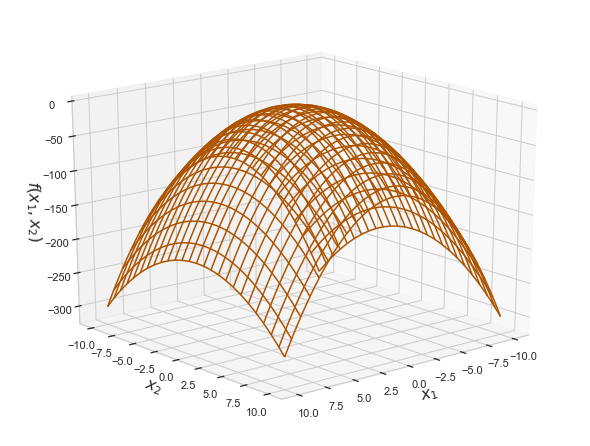

In [3]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

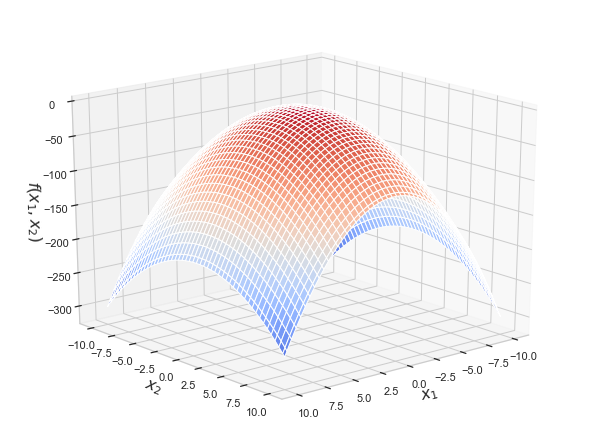

In [4]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [5]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 8
         Function evaluations: 40
         Gradient evaluations: 10


      fun: -0.37499999999999917
 hess_inv: array([[0.25132329, 0.00137504],
       [0.00137504, 0.50142814]])
      jac: array([9.31322575e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.25000002, 0.50000002])

#### Example 2

$f(x_1,x_2)= - \sqrt{x_1^2+x_2^2}$

In [6]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -1.0 * sqrt(x1**2 + x2**2)

Text(0.5, 0, '$f(x_1, x_2)$')

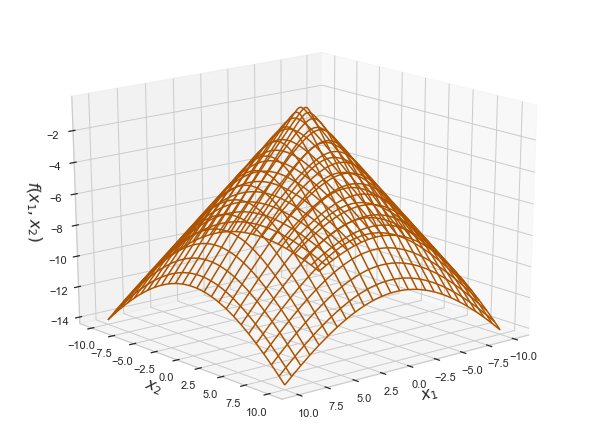

In [7]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

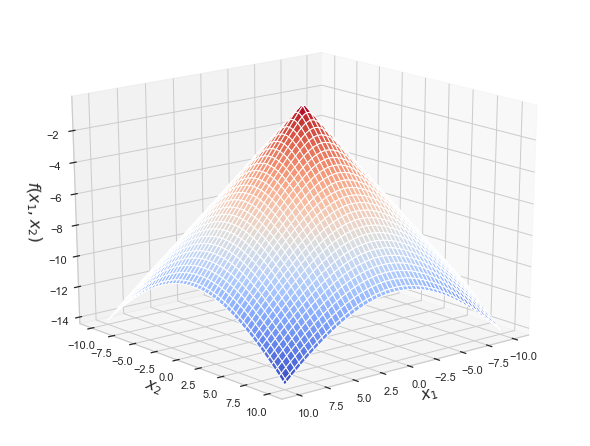

In [8]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20,50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [9]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 580
         Gradient evaluations: 142


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 11
     njev: 142
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

#### Example 3

$f(x_1,x_2)=x_2^2-x_1^2$

In [10]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = x2**2 - x1**2

Text(0.5, 0, '$f(x_1, x_2)$')

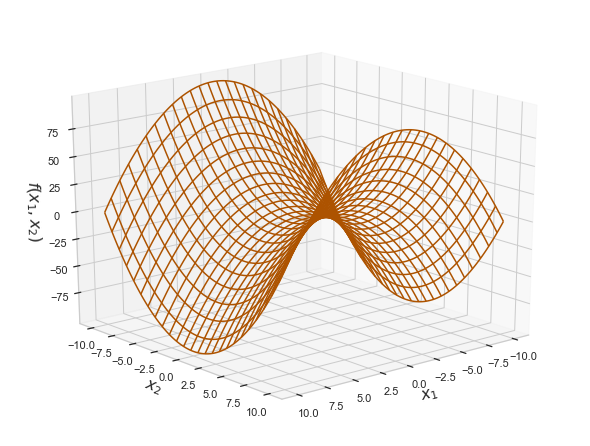

In [11]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

Text(0.5, 0, '$f(x_1, x_2)$')

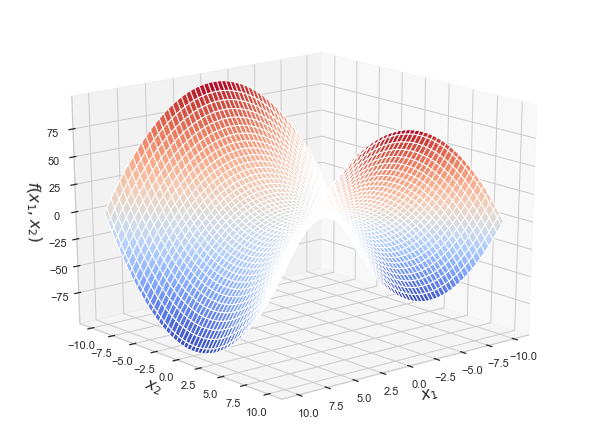

In [12]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [13]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 580
         Gradient evaluations: 142


      fun: 4.7771336629045634e-09
 hess_inv: array([[1.02649054e-08, 4.51063218e-10],
       [4.51063218e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 580
      nit: 11
     njev: 142
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323835e-10])

#### Notes
* Machines optimize numerically, and this process can fail.
* An algorithm may have no global optimum, such as my **Discrete Factor Model** or **deep learning algorithms**.
* The process of numerical optimization may get **stuck**.

### Representation: Start with the Obvious

* We begin with a simple but straightforward approach for supervised learning: **the bivariate linear regression model**.  



1. Linear regression remains an indespensible tool for statistical learning and prediction.  It has been around for a very long time and is the topic of many textbooks.


2. It serves as a useful place to start as we build our toolkit of applied statistical learning techniques.  Indeed, many of the tools we will talk about are generalizations of linear regression, so a thorough understanding of it is important.


3. The linear model can be expressed as a optimization problem with a closed-form solution, which makes it computationally tractible.  (You could do it by hand if you had to.)


4. Empirical studies that are focused less on prediction and more on measuring the impact of a change in a feature on some outcome of interest still dominate policy-making.  Indeally, policy-makers are interested in evaluating the impact of, say, an additional year of education on wages when making policy about subsidizing education.  Is the effect different than zero?  If so, is it large and accurately measured?  Is the effect the same over different ages or cohorts?


5. A linear model is a first-order Taylor approximation to a higher-order relation.  In the days of expensive computing, we convinced ourselves that so-called **higher order terms** or **HOT** were not interesting or relevant.  (We know that's not the case now.)  Besides, many of the obstacles we face in accurate statistical learning, such as omitted variable bias, impact our entire toolkit, including linear models.

#### Some History



* For succinct discussions, see [this](https://www.utdallas.edu/~herve/Abdi-LeastSquares06-pretty.pdf) and [this](http://www.amstat.org/publications/jse/v9n3/stanton.html).  Highlights: 


1. In the early 1800's, mathematicians Gauss and Legendre published on the **Method of Least Squares**.  (Gauss claims he was there first in the late 1700's.  Laplace may have been there earlier.)  


2. Galton published actual empirical work **in 1886** using the method.


3. The Bayesian/frequentist schism regarding the interpretation of statistics commences with the work of Fisher, Neyman, and the Pearsons in 1920's (to which we will ultimately return).


4. One of the first complete textbooks that I know of is Edward Malinvaud, *Statistical Methods of Econometrics*, Rand McNally & Company, 1966.

### An Explanatory Model (Supervised Learning)

* Consider the follow relation: $y=f(x)$.

    * $x$ has several different names: 
        1. an explanatory variable
        2. a predictor
        3. a feature

    * $y$ is a quantitative response, which also has several different names:
        1. a dependent variable
        2. an outcome
        3. a label



* $f$ is a mapping from $x$ to $y$ that captures the relation between the two.  It could be linear, non-linear, or discontinuous.  The nature of $f$ is the supervision we provide the computer in machine learning.  To begin with, we instruct the computer that $f$ is linear.  Namely,



* $y=\beta_0 + \beta_1 \cdot x$

In [14]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


/Users/timothysavage/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


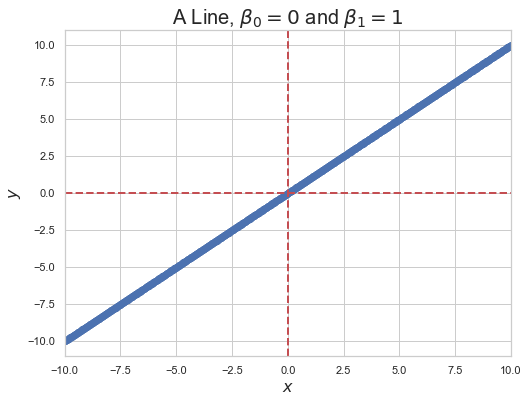

In [15]:
x = linspace(-10, 10, 1000)
y = 0 + 1 * x

plt.figure(figsize = (8, 6))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.title(r'A Line, $\beta_0=0$ and $\beta_1=1$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

* This line is an abstraction that **allows us to focus**.  



* We do not expect from any real-world data that every possible pair $(x, y)$ to lie on this line.  



* Therefore, we summarize our ignorance in a fudge factor, namely:
    * $y=\beta_0 + \beta_1 \cdot x + \epsilon$



* What does the $\epsilon$ capture?
    1. The combined effect of other features that we may or may not know.
    2. The approximation error (or higher order terms).
    3. The purely random component that exists at the level of an individual observation in data (i.e., fundamental unpredictabilty).  



* As a result, if we have a dataset of size $i=(1,...,N)$, we can write the representation as:
    * $y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$



* $\rightarrow$ returns us to a scatterplot (the only thing we really have in the real world).

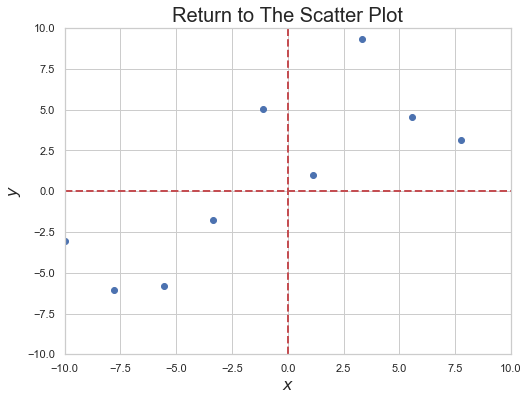

In [16]:
x = linspace(-10, 10, 10)
y = 0 + 1 * x + np.random.normal(0, 4, 10)

plt.figure(figsize = (8, 6))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.title(r'Return to The Scatter Plot', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

### Gauss Embeds This Idea into an Unconstrained Optimization Problem

* In the real world, we have observed data.  



* Suppose we use a supervised linear model.  How best to fit those data?  Guass' insight was to imbed it into an optimization problem, namely the minimization of a convex surface, applying the principle of least squares.



* Denote $\epsilon_i$ to be a residual.  Define the following convex surface, the sum of squared residuals (SSR):

SSR$(\beta_0,\beta_1) = \sum_i \epsilon_i^2=\sum_i \left(y_i-\beta_0 - \beta_1 \cdot x_i\right)^2$



* The goal is to minimize the SSR with respect to $\beta_0$ and $\beta_1$.  That is, choose $\hat\beta_0$ and $\hat\beta_1$ such that SSR$(\hat\beta_0, \hat\beta_1$) is minimized.  (Recall, we have no control over the data themselves, but we can control $\beta_0$ and $\beta_1$.)



* It is possible to conceptualize this SSR surface.  What is the dimensionality of $\Re$ for SSR$(\beta_0,\beta_1)$?
    * Counting: One dimension for each $\beta$ and one dimension for SSR $\implies \Re^3$ 

Text(0.5, 0, '$SSR(\\beta_0, \\beta_1)$')

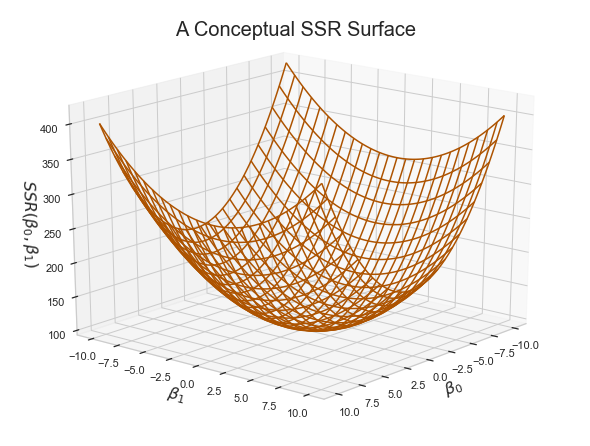

In [17]:
b0 = linspace(-10, 10, 100)
b1 = linspace(-10, 10, 100)
b0, b1 = meshgrid(b0, b1)
rss = -1 * (-2 * b0**2 - b1**2 + b0 + b1 - 100)

fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(b0, b1, rss, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 40)
ax.set_title('A Conceptual SSR Surface', fontsize=20)
ax.set_xlabel(r'$\beta_0$', fontsize = 16)
ax.set_ylabel(r'$\beta_1$', fontsize = 16)
ax.set_zlabel(r'$SSR(\beta_0, \beta_1)$', fontsize = 16)

#### Optimization Yields Closed-Form Solution

* Let $\overline{x}=\frac{1}{N}\sum_i x_i$ be the sample mean of x and $\overline{y}=\frac{1}{N}\sum_i y_i$ be the sample mean of y.  



* Some calculus and algebraic manipulation yields the following:

    $\hat\beta_1 = \displaystyle{\frac{\sum_i(y_i-\overline{y})(x_i-\overline{x})}{\sum_i(x_i-\overline{x})^2} = \frac{Cov(x,y)}{Var(x)}}$ $\leftarrow$ What does this ratio look like?

    $\hat\beta_0 = \overline{y} - \hat\beta_1 \cdot \overline{x} \rightarrow \overline{y}=\hat\beta_0 +  \hat\beta_1 \cdot \overline{x}$ $\leftarrow$ What does this deviation look like?


$\therefore$ the linear model can be imbedded in an optimization problem, which gives the **best fit** or **optmal** line.


#### Notes

* Let's generate some fake data.  
* obs is number of observations.
* params is the number of parameters to be estimated ignoring the constant.  
* It is adjusted to include a constant using statsmodels "add_constant".  



In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.optimize import minimize

In [19]:
obs = 1000
params = 1
random.seed(1898)

params = params + 1
beta = np.random.randn(params, 1)
beta0 = np.zeros((params, 1))
X = np.random.randn(obs, params-1)
X = sm.add_constant(X)
y = np.dot(X, beta) + np.random.randn(obs, 1)

#### Notes
* This is the linear model, $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, to be estimated using least squares by minimization of the SSR. 
* This optimization code should look somewhat familiar.  
* **Focus on the results, not the code.**
* We will use the method of Monte Carlo: generate data from a **known** model and then apply least squares.
* Evaluate how least squares performs against the truth.

In [20]:
def func(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    e = y - np.dot(X, bv)
    return np.array(np.sum(e**2))

def func_grad(b, y, X, obs, params):
    bv = b.view()
    bv.shape = params, 1
    foc = -np.sum(X * (y - np.dot(X, bv)), axis=0)
    return np.array(foc)

res = minimize(func, beta0, args=(y, X, obs, params), method='BFGS', 
               jac=func_grad, options={'disp': True, 'maxiter':1000})

Optimization terminated successfully.
         Current function value: 1024.279509
         Iterations: 5
         Function evaluations: 8
         Gradient evaluations: 8


In [21]:
betahat = res.x.reshape((params, 1))
e = y - np.dot(X, betahat)
s2 = np.dot(np.transpose(e), e)/(obs - params)
cov = s2*res.hess_inv

se, t = np.zeros((params, 1)), np.zeros((params, 1))

for i in range(0, params):
    se[i] = np.sqrt(cov[i,i])
    t[i] = res.x[i]/np.sqrt(cov[i,i])

In [22]:
print("The true values are", beta)
print("The fitted values are", betahat)
print("The standard errors are", se)
print("The t-stats are", t)

The true values are [[1.08345078]
 [0.20771998]]
The fitted values are [[1.05989474]
 [0.23506362]]
The standard errors are [[0.03204447]
 [0.03198825]]
The t-stats are [[33.07574334]
 [ 7.34843684]]


### An Application: The Capital Asset Pricing Model (CAPM)

* CAPM remains one of the workhorse statistical models in finance.  It is so common that sites like Yahoo!Finance report the measures we will estimate statistically.



* CAPM is a useful **base case**: the ground state.
    * Modern portfolio theory of [Harry Markowitz](https://en.wikipedia.org/wiki/Harry_Markowitz).
    * The upshot of the CAPM says that we can directly interpret the intercept and slope coefficients of a linear model as real-world measures relating the excess (or risk-adjusted) returns of a particular stock to the sensitivity of a basket of stocks, such as a specific market.



* It lies at the heart of portfolio optimization that won Harry Markowitz a Nobel Prize in Economics in 1990. The idea is simple: we seek to measure historic correlation patterns between potential investment opportunities.



* It was developed to examine equities, but its application have expanded far beyond this asset class.  As part of the broader undertaking of portfolio optimization, it is used to explain most core concepts.



* Asset Classes:
    * Cash
    * Bonds
    * Equities
    * Real Estate



* Until recently, it was difficult for non-instititutional investors to have exposure to real estate, other than owning a house.  Investors can now expose themselves to real estate as an asset class.



* To be more mathematically precise, let $X$ and $Y$ be random variables with finite variances, $\sigma^2_x$ and $\sigma^2_y$.  Consider some convex combination of $X$ and $Y$, $\alpha X + (1-\alpha) Y$, for which $\alpha$ can be arbitrarily small.  In finance, we call this combination a **portfolio**.  The variance of this portfolio, which is a measure of risk, is:

    $Var(\alpha X + (1-\alpha) Y) = \alpha^2 \sigma^2_x + (1-\alpha)^2 \sigma^2_y + 2\alpha (1 -\alpha) Cov(X, Y)$



* This variance is driven essentially by $\alpha$ and $Cov(X, Y)$. 

    * Risk can be eliminated only when $Cov(X, Y) = -1$ or $1$, which is accomplished through shorting.
    * With imperfect correlation, the focus becomes $\alpha$.
    * Hence, we have Markowitz's **Mean/Variance** model.
    * Let $X_i$ denote asset $i$.
    * Let $w_i$ be an asset allocation weight.
    * Let the portfolio be denoted as P, where P $= \sum_i{w_i X_i}$



* There is considerable theory around minimizing the risk of P for a given return based on the above.  From this theory is straightforward to derive the CAPM (but such derivation is beyond the scope of this class).

### Synthesis: CAPM, the Linear Model and Hypothesis Testing

* Let $r_i$ denote the rate of return to asset $i$, $r_f$ denote the known rate of return on a risk-free asset (for example, short-term US government debt), and $r_m$ denote the rate of return to a portfolio (or a market) that includes $i$.  



* The following equation can be derived:

    $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f)$

    Here, $E(\cdot)$ denotes an expected value (because this is a forward-looking prediction).  
    In CAPM, $\beta$ captures the sensitivity of an asset’s returns to the returns to a portfolio or to the market on which an asset trades.  In other words, it non-diversifiable risk.  
    In addition, $\alpha$ measures an asset $i$’s excess (or abnormal) returns.



* Phrases you may have heard: 

    1. The stock's beta is high
    2. The hedge fund is chasing alpha
    
    
* If we assume informationally-efficient markets, $\alpha \rightarrow 0$ and $\beta \rightarrow 1$.  
    * Why?  Costless arbitrage.

* Formally, we can express our conjecture as a joint hypothesis:

    $H_0: \alpha = 0, \beta=1$
    
    $H_1: \text{ not }H_0$

### Let's Look at the Obvious: Teaching in a Sea of These

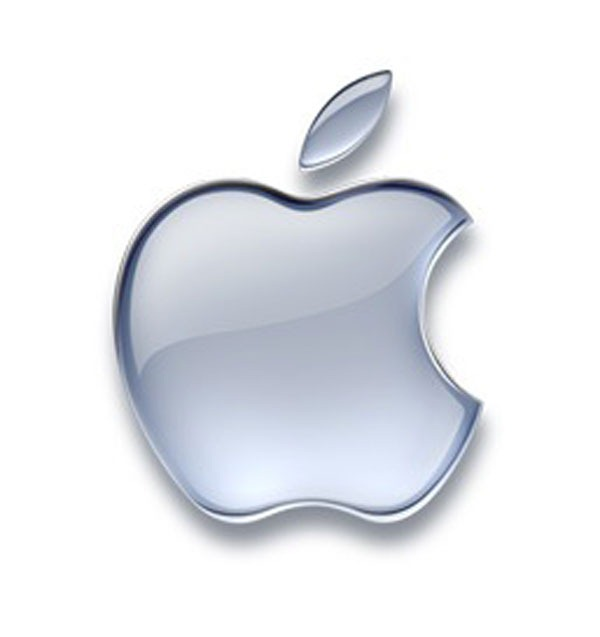

In [23]:
from IPython.display import Image
url = 'http://buzzmybiz.co/wp-content/uploads/2012/06/apple-logo.jpg'
Image(url, width=200, height=200)